# Stochastic nonlinear oscillator in the rotating frame


In this code, we use the nonrotating (lab) frame to study oscillations in a stochastic, classical oscillator subject to an external force, parametric pumping, various nonlinearities, and damping, cf. Eqs. (5.1) and (5.2).

This code is part of the book "Classical and Quantum Parametric Phenomena" authored by Alexander Eichler and Oded Zilberberg,  Oxford University Press 2023. If you use the code in your project, we kindly ask you to cite this book.

In [1]:
############# import packages #####################

%matplotlib inline
import numpy as np
import sdeint
import matplotlib.pyplot as plt
import scipy.signal
import os

# Es ist für unseren Kurs nicht notwendig, die Simulation zu verstehen, es geht uns nur ums Resultat, d.h. die Auslenkung x und deren spektrale Leistungsdichte PSDx

## Functions

In [2]:
############# elements of the Ito equation #####################

def f3(x,t):
    return np.array([x[1],- omega0**2*x[0] - Gamma*x[1] + F0*np.cos(omega*t)/mass])
# for nonrotating frame

def g3(x,t):
    return np.array([[0.,0.],[0.,sigma_m]])

def X2(x):
    return x[0]**2 + x[1]**2

## Run simulation as a function of time

In [3]:
############# run simulation #####################

#parameter values
omega0 = 1 # angular resonance frequency
omega = omega0
mass = 1
Q = 1e2
Gamma = omega0/Q # resonance bandwidth in units of Hz (angular frequency)
T = 300 # temperature in units of K
sigma_m = np.sqrt(2*1.38e-23*T*Gamma*mass)/mass # thermal force noise sigma_D *divided by mass*, double-sided convention
theta = 0. # parametric driving phase
F0 = 0 # driving force normalized by mass (kg)

total_time = 10000
sampling_num = total_time*omega0*10

tspan = np.linspace(0.0, total_time, sampling_num) # array with time steps
x0 = np.array([0.0, 0.0]) # initial condition
X_quad = np.cos(omega0*tspan) # in-phase local oscillator
Y_quad = np.sin(omega0*tspan) # out-of-phase local oscillator

result = sdeint.itoint(f3, g3, x0, tspan) # run the simulation
x = result[:,0] # displacement
p = result[:,1] # derivate of displacement

In [4]:
############# calculate PSD #####################

f,PSDx = scipy.signal.periodogram(result[::,0],sampling_num/total_time,return_onesided=True)

In [5]:
############## add your code here to check the FDT #################

# calculate variance of x directly
# calculate variance of x from the PSD
# check fluctuation-dissipation theorem 

## Plot results

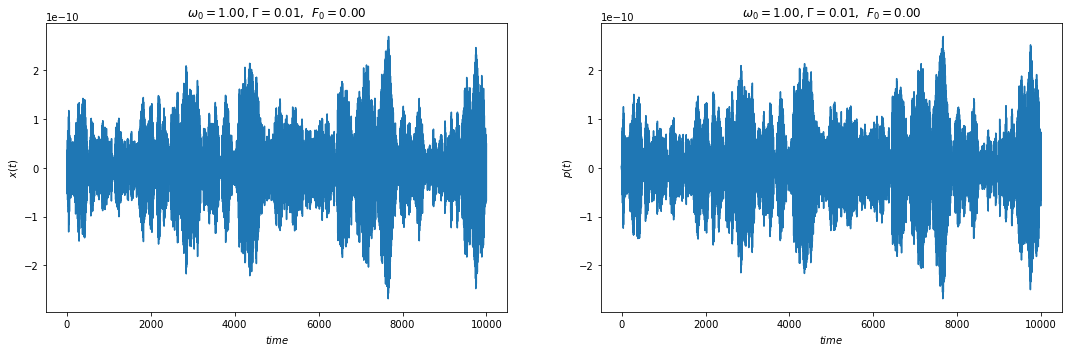

4.945475433118486e-21


In [8]:
########### plot x and p as a function of time ##########

fig = plt.figure(figsize=(15, 5))

axes = fig.add_subplot(1,2,1)
axes.plot(tspan, x, label=r"$x(t)$")
axes.set_xlabel(r"$time$")
axes.set_ylabel(r"$x(t)$")
#axes.set_xlim(1900,2000)
axes.set_title(r"$\omega_0=%.2f$, $\Gamma=%.2f$,  $F_0=%.2f$"%(omega0, Gamma, F0))

axes = fig.add_subplot(1,2,2)
axes.plot(tspan, p, label=r"$p(t)$")
axes.set_xlabel(r"$time$")
axes.set_ylabel(r"$p(t)$")
#axes.set_xlim(1900,2000)
axes.set_title(r"$\omega_0=%.2f$, $\Gamma=%.2f$,  $F_0=%.2f$"%(omega0, Gamma, F0))

fig.tight_layout(w_pad=5)
plt.show()

print(np.var(x)) # Varianz der Auslenkung

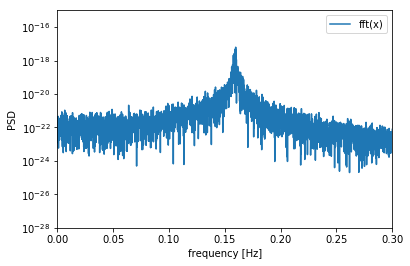

4.945475433118478e-21


In [9]:
########### plot PSD ##########

plt.semilogy(f[1:-1],PSDx[1:-1],label="fft(x)")
plt.xlim([0, 0.3]) # plot range in x-direction   
plt.ylim([1e-28, 1e-15]) # plot range in y-direction
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD')
plt.legend()
plt.show()

print(sum(PSDx)*(f[1]-f[0])) # numerisches Integral des Spektrums = Varianz der Auslenkung
# Was geschieht mit dem Integral, wenn wir die FT doppelseitig ausführen?

## Save data

In [25]:
########### create directory and save file ##########

#savedir = 'data' # directory where data is saved
#os.makedirs(savedir, exist_ok=True) # create directory

#data = np.array([tspan,np.real(result[::,0])]).T
#np.savetxt(savedir +'/time_trace.dat', data, delimiter=',')

#data = np.array([f,np.real(PSDx)]).T
#np.savetxt(savedir +'/PSDx.dat', data, delimiter=',')